In [2]:
import tensorflow as tf 
from tensorflow.python.ops import rnn, rnn_cell
import numpy as np 

from tensorflow.examples.tutorials.mnist import input_data

In [3]:
#call mnist function
mnist = input_data.read_data_sets('MNIST_data', one_hot=True) 

learningRate = 1e-4
trainingIters = 10000
batchSize = 10
displayStep = 100

nInput = 28 # we want the input to take the 28 pixels
nSteps = 28  # every 28
nHidden = 64 # number of neurons for the RNN
nClasses = 10 # this is MNIST so you know

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
x = tf.placeholder('float', [None, nSteps, nInput])
y = tf.placeholder('float', [None, nClasses])

weights = {
    'out': tf.Variable(tf.random_normal([nHidden, nClasses]))
}

biases = {
    'out': tf.Variable(tf.random_normal([nClasses]))
}

In [5]:
def RNN(x, weights, biases):
    x = tf.transpose(x, [1, 0, 2])
    x = tf.reshape(x, [-1, nInput])
    #configuring so you can get it as needed for the 28 pixels
    x = tf.split(axis=0, num_or_size_splits=nSteps, value=x) 
    
    #find which lstm to use in the documentation
    lstmCell = tf.contrib.rnn.LSTMCell(nHidden)
    
    #for the rnn where to get the output and hidden state 
    outputs, states = tf.contrib.rnn.static_rnn(cell=lstmCell,
                                                inputs = x,
                                                dtype = tf.float32)
    
    return tf.matmul(outputs[-1], weights['out'])+ biases['out']

pred = RNN(x, weights, biases)

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
#optimization
#create the cost, optimization, evaluation, and accuracy
#for the cost softmax_cross_entropy_with_logits seems really good
cost = tf.losses.softmax_cross_entropy(logits = pred, onehot_labels = y)
optimizer = tf.train.AdamOptimizer(learningRate).minimize(cost)
correctPred = tf.equal(tf.argmax(y, 1), tf.argmax(pred, 1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [7]:
train_result = [[], []]
test_result = [[], []]
train_loss = [[], []]
test_loss = [[], []]

init = tf.global_variables_initializer()
with tf.Session() as sess:
    testData = mnist.test.images.reshape((-1, nSteps, nInput))
    testLabel = mnist.test.labels
    
    sess.run(init)
    step = 1

    while step * batchSize < trainingIters:
        batchX, batchY = mnist.train.next_batch(batchSize)
        batchX = batchX.reshape((batchSize, nSteps, nInput))

        sess.run(optimizer, feed_dict={x:batchX, y:batchY})

        if step % displayStep == 0:
            acc = accuracy.eval(feed_dict={x:batchX, y:batchY})
            loss = cost.eval(feed_dict={x:batchX, y:batchY})
            acc_test = sess.run(accuracy, feed_dict={x:testData, y:testLabel})
            loss_test = sess.run(cost, feed_dict={x:testData, y:testLabel})
            print("Iter " + str(step*batchSize) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc), "| Test acc:", acc_test)

            # iter
            train_result[0].append(step * batchSize)
            test_result[0].append(step * batchSize)
            train_loss[0].append(step * batchSize)
            test_loss[0].append(step * batchSize)
            # acc and loss
            train_result[1].append(acc)
            test_result[1].append(acc_test)
            train_loss[1].append(loss)
            test_loss[1].append(loss_test)
            
        step +=1
    print('Optimization finished')
    

2022-11-01 14:24:20.542723: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-01 14:24:20.547712: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Iter 1000, Minibatch Loss= 2.231103, Training Accuracy= 0.20000 | Test acc: 0.198
Iter 2000, Minibatch Loss= 1.889840, Training Accuracy= 0.30000 | Test acc: 0.2523
Iter 3000, Minibatch Loss= 1.829956, Training Accuracy= 0.30000 | Test acc: 0.3225
Iter 4000, Minibatch Loss= 1.779648, Training Accuracy= 0.40000 | Test acc: 0.4172
Iter 5000, Minibatch Loss= 1.693254, Training Accuracy= 0.30000 | Test acc: 0.4657
Iter 6000, Minibatch Loss= 1.619739, Training Accuracy= 0.40000 | Test acc: 0.5128
Iter 7000, Minibatch Loss= 1.787332, Training Accuracy= 0.30000 | Test acc: 0.5391
Iter 8000, Minibatch Loss= 0.777030, Training Accuracy= 0.70000 | Test acc: 0.5896
Iter 9000, Minibatch Loss= 0.830382, Training Accuracy= 0.80000 | Test acc: 0.6138
Optimization finished


In [10]:
import matplotlib.pyplot as plt

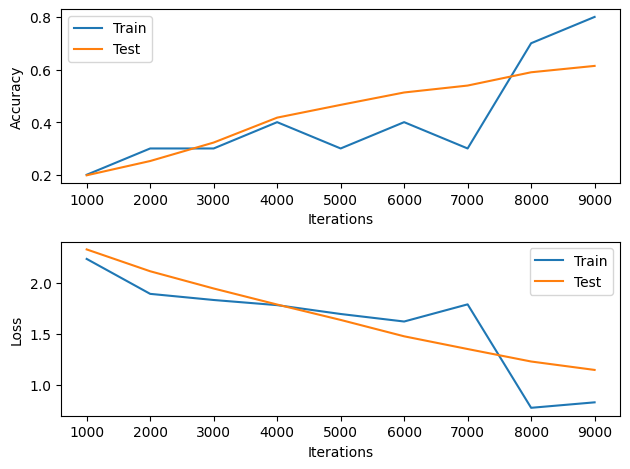

In [9]:

train_result, test_result, train_loss, test_loss = [train_result, test_result, 
train_loss, test_loss]
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_xlabel("Iterations")
ax2.set_xlabel("Iterations")
    
    # Train/test accuracy
ax1.plot(train_result[0], train_result[1], label='Train')
ax1.plot(test_result[0], test_result[1], label='Test')
ax1.set_ylabel("Accuracy")
ax1.legend()
    
    # Train/test accuracy
ax2.plot(train_loss[0], train_loss[1], label='Train')
ax2.plot(test_loss[0], test_loss[1], label='Test')
ax2.set_ylabel("Loss")
ax2.legend()

fig.tight_layout()   